In [15]:
import xarray as xr
import numpy as np
from glob import glob

In [16]:
masks = xr.open_dataset('data/GLORYS_MASKS.nc')

In [36]:
tropical = xr.open_mfdataset('data/GLORYS12V1/HOVMOLLERS/data/tropical/*.nc')
camerica = xr.open_mfdataset('data/GLORYS12V1/HOVMOLLERS/data/camerica/*.nc')
mexico = xr.open_mfdataset('data/GLORYS12V1/HOVMOLLERS/data/mexico/*.nc')
usa = xr.open_mfdataset('data/GLORYS12V1/HOVMOLLERS/data/usa/*.nc')
peru = xr.open_mfdataset('data/GLORYS12V1/HOVMOLLERS/data/peru/*.nc').sortby('latitude', ascending=False)
chile = xr.open_mfdataset('data/GLORYS12V1/HOVMOLLERS/data/chile/*.nc').sortby('latitude', ascending=False)

/home/lucas/miniconda3/envs/forecast/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/lucas/miniconda3/envs/forecast/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

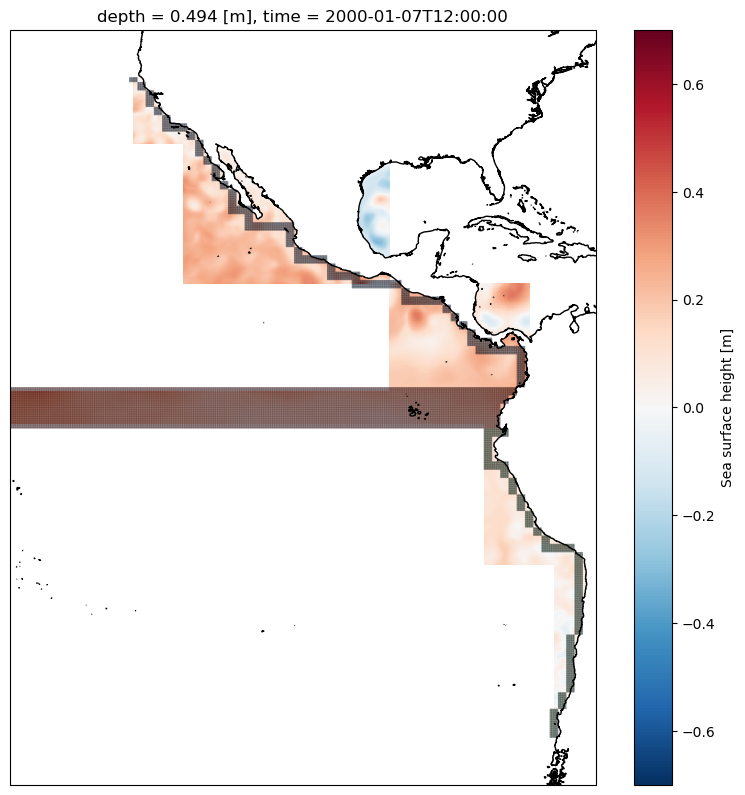

In [38]:
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
fig, ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(10,10), facecolor='w', dpi=100)
ax.set_extent([-140,-69,-40,40])
ax.coastlines('10m')

tropical.zos.sel(time='2000-01-07').plot(ax=ax, cmap='RdBu_r', vmin=-0.7, vmax=0.7, add_colorbar=False)
camerica.zos.sel(time='2000-01-07').plot(ax=ax, cmap='RdBu_r', vmin=-0.7, vmax=0.7, add_colorbar=False)
mexico.zos.sel(time='2000-01-07').plot(ax=ax, cmap='RdBu_r', vmin=-0.7, vmax=0.7, add_colorbar=False)
usa.zos.sel(time='2000-01-07').plot(ax=ax, cmap='RdBu_r', vmin=-0.7, vmax=0.7, add_colorbar=False)
peru.zos.sel(time='2000-01-07').plot(ax=ax, cmap='RdBu_r', vmin=-0.7, vmax=0.7, add_colorbar=False)
chile.zos.sel(time='2000-01-07').plot(ax=ax, cmap='RdBu_r', vmin=-0.7, vmax=0.7, add_colorbar=True)

ax.pcolor(masks.longitude, masks.latitude, masks.tropicalmask.where(masks.tropicalmask), alpha=0.25, cmap='Reds_r', edgecolor='k')
ax.pcolor(masks.longitude, masks.latitude, masks.coastmask_north.where(masks.coastmask_north), alpha=0.25, cmap='Blues_r', edgecolor='k')
ax.pcolor(masks.longitude, masks.latitude, masks.coastmask_south.where(masks.coastmask_south), alpha=0.25, cmap='Greens_r', edgecolor='k')

In [3]:
tropical = tropical.where(masks.tropicalmask==1).mean('latitude').dropna('longitude').load().drop('depth')
tropical = tropical.rename({'longitude':'lon'})


In [5]:

camerica = camerica.where(masks.coastmask_north==1).mean('longitude').dropna('latitude').load().drop('depth')
mexico = mexico.where(masks.coastmask_north==1).mean('longitude').dropna('latitude').load().drop('depth')
usa = usa.where(masks.coastmask_north==1).mean('longitude').dropna('latitude').load().drop('depth')

coastnorth = xr.concat([camerica, mexico, usa], 'latitude').drop_duplicates('latitude')
coastnorth = coastnorth.rename({'latitude':'lat'})

In [10]:
peru = peru.where(masks.coastmask_south==1).mean('longitude').dropna('latitude').load().drop('depth')
chile = chile.where(masks.coastmask_south==1).mean('longitude').dropna('latitude').load().drop('depth')

coastsouth = xr.concat([peru, chile], 'latitude').drop_duplicates('latitude')
coastsouth = coastsouth.rename({'latitude':'lat'})

/home/lucas/miniconda3/envs/forecast/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/lucas/miniconda3/envs/forecast/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

In [11]:
tropical.coords['index']   = ('lon',np.arange(len(tropical.lon)))
coastnorth.coords['index'] = ('lat', 1+tropical.index[-1].item()+np.arange(len(coastnorth.lat)))
coastsouth.coords['index'] = ('lat', 1+tropical.index[-1].item()+np.arange(len(coastsouth.lat)))

In [14]:
tropical.to_netcdf('data/GLORYS12V1/HOVMOLLERS/glorys_tropical.nc')
coastnorth.to_netcdf('data/GLORYS12V1/HOVMOLLERS/glorys_coastnorth.nc')
coastsouth.to_netcdf('data/GLORYS12V1/HOVMOLLERS/glorys_coastsouth.nc')